In [ ]:
name = "Candido Regis"
student_id = "123123123"

In [35]:
# You are ONLY allowed to use the following libraries
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# run this code 
magic_number = sum([int(ele) for ele in student_id])%5 + 5
magic_number 

8

In [37]:
sample_size = 100

In [38]:
nr_rooms = np.random.randint(1,magic_number,sample_size)
nr_wrooms = np.random.randint(1,magic_number,sample_size)
nr_rooms, nr_wrooms


(array([6, 4, 7, 6, 6, 6, 6, 5, 3, 5, 4, 6, 7, 4, 4, 6, 6, 3, 4, 4, 2, 2,
        1, 5, 3, 6, 6, 7, 4, 7, 5, 5, 5, 7, 3, 7, 5, 3, 4, 3, 7, 2, 3, 7,
        1, 6, 3, 2, 5, 3, 7, 7, 5, 1, 3, 4, 3, 7, 7, 3, 3, 3, 6, 7, 3, 7,
        3, 5, 3, 6, 6, 7, 6, 2, 2, 3, 1, 5, 5, 6, 4, 3, 4, 6, 4, 6, 3, 4,
        2, 6, 3, 4, 3, 7, 3, 5, 2, 1, 6, 2]),
 array([5, 6, 2, 7, 5, 6, 3, 4, 7, 7, 3, 1, 4, 5, 7, 7, 2, 5, 2, 2, 3, 3,
        6, 3, 1, 3, 1, 6, 3, 5, 7, 3, 3, 7, 7, 3, 2, 1, 7, 4, 7, 3, 6, 1,
        4, 4, 3, 6, 6, 1, 1, 6, 6, 6, 5, 1, 4, 4, 1, 4, 6, 7, 1, 6, 3, 5,
        6, 3, 6, 2, 5, 2, 1, 6, 7, 5, 2, 5, 5, 7, 1, 1, 2, 5, 4, 7, 6, 7,
        4, 7, 4, 2, 5, 1, 4, 3, 6, 1, 7, 4]))

In [39]:
w1_fixed = magic_number * np.random.random()
w2_fixed = magic_number * np.random.random()
w1_fixed, w2_fixed

(7.563508525394379, 5.0366010860282655)

In [40]:
price = w1_fixed * nr_rooms + w2_fixed*nr_wrooms
price

array([70.56405658, 60.47364062, 63.01776185, 80.63725875, 70.56405658,
       75.60065767, 60.49085441, 57.96394697, 57.94673318, 73.07375023,
       45.36383736, 50.41765224, 73.09096402, 55.43703953, 65.5102417 ,
       80.63725875, 55.45425332, 47.87353101, 40.32723627, 40.32723627,
       30.23682031, 30.23682031, 37.78311504, 52.92734589, 27.72712666,
       60.49085441, 50.41765224, 83.16416619, 45.36383736, 78.12756511,
       73.07375023, 52.92734589, 52.92734589, 88.20076728, 57.94673318,
       68.05436294, 47.8907448 , 27.72712666, 65.5102417 , 42.83692992,
       88.20076728, 30.23682031, 52.91013209, 57.98116076, 27.70991287,
       65.5274555 , 37.80032883, 45.34662357, 68.03714914, 27.72712666,
       57.98116076, 83.16416619, 68.03714914, 37.78311504, 47.87353101,
       35.29063519, 42.83692992, 73.09096402, 57.98116076, 42.83692992,
       52.91013209, 57.94673318, 50.41765224, 83.16416619, 37.80032883,
       78.12756511, 52.91013209, 52.92734589, 52.91013209, 55.45

### Question #1: Linear Model


In [41]:
## Write a method (my_linear_model(...)) to train a model to predict house price based on given input parameters (nr_rooms and nr_washrooms)
def my_linear_model(nr_rooms, nr_wrooms, price, Learning_Rate=0.01, nr_epochs=20, w1= 0.32, w2=-0.17, costs=[]):
    for i in range(nr_epochs):
        y_hat = w1 * nr_rooms + w2 * nr_wrooms
        cost = sum((price - y_hat) ** 2)/sample_size
        costs.append(cost)
        w1 = w1 - Learning_Rate * sum((price - y_hat) * (-nr_rooms))/sample_size
        w2 = w2 - Learning_Rate * sum((price - y_hat) * (-nr_wrooms))/sample_size
    return w1, w2, costs # weights associated with the two input parameters and a list containing the cost values for each training epoch

In [42]:
w1, w2, costs = my_linear_model(nr_rooms, nr_wrooms, price)

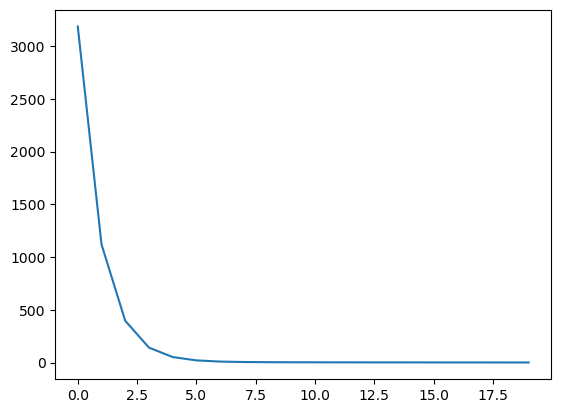

In [43]:
plt.plot(costs)

In [44]:
target = price.copy()
target = np.array([1  if value > np.mean(target) else 0 for value in target])
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

### Question #2: Binary Model

In [45]:
### Write a method (my_binary_model(...)) to train a binary classification model  using nr_rooms, nr_wrooms as input and target as a label
def my_binary_model(nr_rooms, nr_wrooms, target, Learning_Rate=0.01, nr_epochs=20, w1= -0.22, w2=0.17, costs=[]):

    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    for i in range(nr_epochs):
        # Using the sigmoid function to compute predictions
        y_hat = sigmoid(w1 * nr_rooms + w2 * nr_wrooms)

        # Compute cost
        cost = (-np.sum(target * np.log(y_hat) + (1 - target) * np.log(1 - y_hat)))/sample_size
        costs.append(cost)

        # Compute gradients and update weights
        w1 = w1 - Learning_Rate * np.sum((y_hat - target) * nr_rooms)/sample_size
        w2 = w2 - Learning_Rate * np.sum((y_hat - target) * nr_wrooms)/sample_size
    return w1, w2, costs # weights associated with the two input parameters and a list containing the cost values for each training epoch


In [46]:
w1, w2, costs = my_binary_model(nr_rooms, nr_wrooms, target)

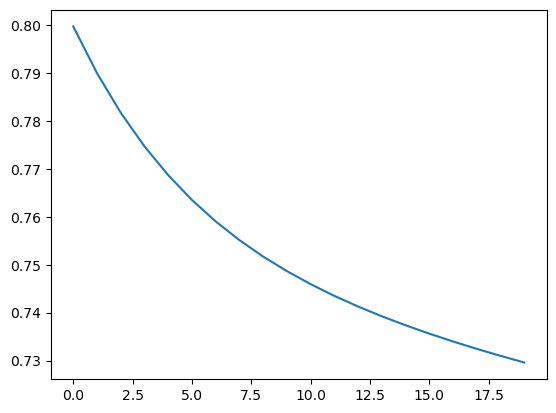

In [47]:
plt.plot(costs)

#### Rename the file to: <b> your_name_student_id_assignment1.ipynp </b>
#### Run all the cells (in vs-code: Run All)
#### Save the file
#### Upload the file to <b> Assignment 1 </b> submission folder